Contains tests in an attempt to create a general function that treats the instances in the .dat format.

Points to consider:
* The first line is the column name and needs to be interpreted as well. If the instance is random it is going to indicate the number of cibles, otherwise it shows the gridsize.
* In case it is not random, other lines may contain useful information ?? I still doubt this one, because it would only be useful if we didnt have the coordinates of the cibles being removed, which we have, so we can always just count how many pairs of coordinates we have to recover this information.

In [82]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
random_folder = "../Projet-Meta-Heuristiques/Projet de métaheuristiques - Instances cibles générées aléatoirement"
truncated_folder = "../Projet-Meta-Heuristiques/Projet de métaheuristiques - Instances grilles tronquées"

In [3]:
# reading the truncated instances
truncated_files = Path(truncated_folder)
ord_trunc = sorted(truncated_files.glob("*.dat")) # orders files by lexicographic order 
# and takes only the .dat files, in any case there is something different in the folder

In [51]:
random_files = Path(random_folder)
ord_rand = sorted(random_files.glob("*.dat"))

In [63]:
rand_df = pd.read_csv(ord_rand[0], delimiter = "\t")
col = rand_df.columns[0]
print(rand_df[col])
rand_df[col][150].split()[2].strip(";")

0         0  0.00 0.00 
1          1  0.01 2.15
2          2  0.85 5.11
3          3  3.87 5.54
4          4  2.86 5.41
             ...       
146      146  4.70 3.82
147      147  4.11 3.04
148      148  5.04 2.29
149      149  6.17 6.60
150     150  1.41 6.68;
Name:  Nombre de cibles : 151, Length: 151, dtype: object


'6.68'

In [19]:
df = pd.read_csv(ord_trunc[0], delimiter = "\t")
print(df)

   taille de la grille complète :=100;
0    nombre de cibles supprimées :=13;
1           param:   Points:  a  b  :=
2                           1 : (3, 5)
3                           2 : (3, 6)
4                           3 : (3, 7)
5                           4 : (4, 5)
6                           5 : (4, 6)
7                           6 : (4, 7)
8                           7 : (5, 5)
9                           8 : (5, 6)
10                          9 : (5, 7)
11                         10 : (8, 2)
12                         11 : (8, 3)
13                         12 : (9, 2)
14                         13 : (9, 3)


### String testing

In [25]:
df_ = df[df.columns[0]]
x = df_[0]
x_ = x.split(maxsplit=1)
print(x_)

['nombre', 'de cibles supprimées :=13;']


In [50]:
col = df.columns[0]
col.split(":")[1].strip("=;")

'100'

In [29]:
df_ = df[df.columns[0]]
x = df_[4]
x_ = x.split(":")
print(x_)

[' 3 ', ' (3, 7)']


In [38]:
x_[1].strip(" ()").split(",")

['3', ' 7']

In [ ]:
instance = {}
for el in df_:
    aux = el.split(':', maxsplit=1)
    try:
        ind = int(aux[0].strip())
    except ValueError:
        continue
    a, b = map(int, aux[1].strip(" ()").split(","))
    instance[ind] = (a,b) # ok

In [43]:
print(instance)
print(instance[1] + instance[2])
print(np.linalg.norm(instance[1])) # ok

{1: (3, 5), 2: (3, 6), 3: (3, 7), 4: (4, 5), 5: (4, 6), 6: (4, 7), 7: (5, 5), 8: (5, 6), 9: (5, 7), 10: (8, 2), 11: (8, 3), 12: (9, 2), 13: (9, 3)}
(3, 5, 3, 6)
5.830951894845301


## Test Functions

In [79]:
def file_to_instance(filepath):
    '''Function that transforms a .dat file with a certain number of coordinates
    into an instance of the sensor positioning problem. The function also identifies
    if the instance is generated ramdomly or if it was created by the exclusion of
    certain cible coordinates. In the first case, the instance is generated directly
    from the given coordinates. In the second, a full grid is generated and the 
    indicated cibles are removed.
    
    Parameters:
    - filepath: string, indicates the path to a .dat file
    Returns:
    - instance: dict, tuple, int; stores the coordinates of the cibles in the instance.'''
    # read file 
    df = pd.read_csv(filepath, delimiter = "\t")
    # get the column name 
    col = df.columns[0] # it should only have one column name

    column = df[col] # get the series of the actual data 

    left, right = col.split(":") # retrieving information
    if left.strip() == 'taille de la grille complète':
        # fall into the first case: not random
        # cible removal
        N = int(right.strip("=;")) # grid size
        n = int(np.sqrt(N))

        coordinates = []
        # treating the coordinates
        for el in column:
            aux = el.split(':', maxsplit=1)
            try:
                ind = int(aux[0].strip()) # this index is very much an accessory but lets keep it
                # if it is one of the string lines of the series, it will not crash 
                # makes sure we only get numerical values
            except ValueError:
                continue # if it's not numerical, moves on to the next line
            a, b = map(int, aux[1].strip(" ()").split(",")) # treats teh tuple as a string and gets the coordinates
            coordinates.append((a,b))

        # create the full instance
        instance = []
        for i in range(1,n+1):
            for j in range(1,n+1):
                if (i, j) not in coordinates:
                    instance.append((i, j))
    
    elif left.strip() == "Nombre de cibles":
        instance = []
        for i in range(int(right.strip())):
            ind, a, b = df[col][i].split()
            instance.append((int(float(a.strip())),int(float(b.strip(" ;")))))

    return instance

In [80]:
file_to_instance(ord_rand[0]) # SUCESSO 

[(0, 0),
 (0, 2),
 (0, 5),
 (3, 5),
 (2, 5),
 (6, 6),
 (4, 6),
 (1, 6),
 (4, 6),
 (1, 3),
 (4, 2),
 (3, 2),
 (5, 0),
 (1, 2),
 (2, 5),
 (1, 1),
 (0, 3),
 (3, 3),
 (1, 4),
 (3, 1),
 (1, 0),
 (2, 3),
 (3, 4),
 (2, 3),
 (2, 6),
 (3, 1),
 (2, 3),
 (3, 6),
 (5, 2),
 (2, 3),
 (5, 0),
 (6, 6),
 (1, 5),
 (2, 5),
 (1, 1),
 (3, 5),
 (0, 5),
 (2, 5),
 (6, 6),
 (1, 0),
 (2, 0),
 (3, 0),
 (1, 4),
 (4, 6),
 (1, 0),
 (6, 5),
 (4, 1),
 (1, 4),
 (1, 1),
 (2, 2),
 (6, 0),
 (3, 4),
 (3, 4),
 (5, 2),
 (3, 4),
 (6, 4),
 (0, 4),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 0),
 (1, 6),
 (4, 6),
 (2, 6),
 (4, 6),
 (1, 3),
 (2, 2),
 (0, 1),
 (1, 3),
 (6, 3),
 (3, 0),
 (0, 0),
 (1, 4),
 (4, 5),
 (2, 6),
 (2, 4),
 (5, 1),
 (1, 6),
 (5, 5),
 (2, 1),
 (2, 4),
 (3, 2),
 (6, 4),
 (4, 2),
 (2, 2),
 (3, 0),
 (1, 0),
 (3, 3),
 (1, 0),
 (4, 0),
 (4, 0),
 (6, 3),
 (5, 2),
 (2, 0),
 (6, 5),
 (0, 1),
 (1, 1),
 (0, 3),
 (1, 3),
 (1, 3),
 (6, 6),
 (5, 3),
 (3, 6),
 (1, 6),
 (3, 6),
 (4, 5),
 (2, 2),
 (0, 6),
 (5, 0),
 (1, 2),
 (2, 5),
 

In [87]:
inst = file_to_instance(ord_trunc[1])

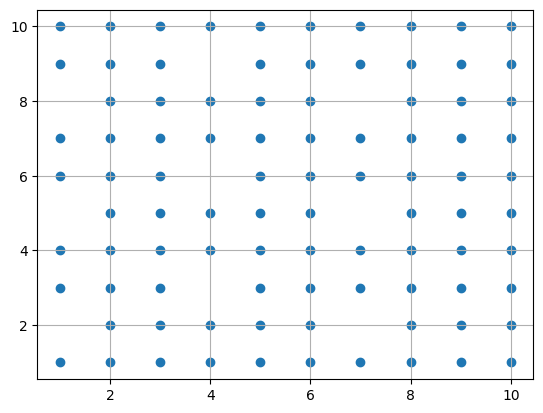

In [88]:
x, y = zip(*inst)
plt.scatter(x, y)
plt.grid() # CINEMA 